In [ ]:
%pip install numpy pandas scikit-learn matplotlib seaborn

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [37]:
# Load the dataset
url_dataset = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
data = pd.read_csv(url_dataset)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


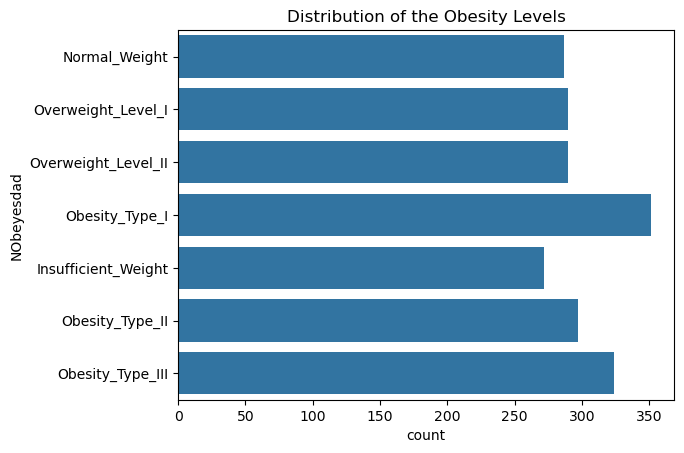

In [38]:
# EDA
sns.countplot(y="NObeyesdad", data=data)
plt.title("Distribution of the Obesity Levels")
plt.show()

In [39]:
# checking for null values
print(data.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [40]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Preprocessing the data
### Feature Scaling

In [41]:
# Standardizing continuous numerical features
continuous_columns = data.select_dtypes(include=["float64"]).columns.to_list()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])

# converting to a DF
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)
scaled_data.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


### One-hot encoding

In [42]:
# Categorical columns
categorical_columns = scaled_data.select_dtypes(include=["object"]).columns.to_list()
categorical_columns.remove("NObeyesdad") # remove target column

# Apply one hot encoding from scikit learn
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DF
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining with the original df
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df],axis=1)

prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Encode the target variable

In [43]:
prepped_data["NObeyesdad"] = prepped_data["NObeyesdad"].astype("category").cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Select variables

In [44]:
X = prepped_data.drop("NObeyesdad", axis=1)
y = prepped_data['NObeyesdad']

## Model Training and Evaluation

In [45]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

### Logistic Regression with One vs One approach
- The algorithm train a binary classifier for every pair of classes in the dataset
- If there are k classes, this results in k(k-1)/2 classifiers.
- Each classifier is trained to distinguish between two specific classes, ignoring the rest
- During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons

Advantages:
- Suitable for algorithms that are computationally expensive to train on many samples because each binary classifier deals with a smaller dataset (only samples from two classes)
- Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time

Disadvantages:
- Computationally expensive for datasets with a large number of classes due to the large number of classifiers required
- May lead to ambiguous prediction if voting results in a tie

In [50]:
# Training
LR_ovo = LogisticRegression(max_iter=1000)
model_ovo = OneVsOneClassifier(LR_ovo)
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [47]:
y_pred_ovo = model_ovo.predict(X_test)
print("One vs One Strategy")
print(f"Accuracy:{np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%") # checked

One vs One Strategy
Accuracy:92.2%


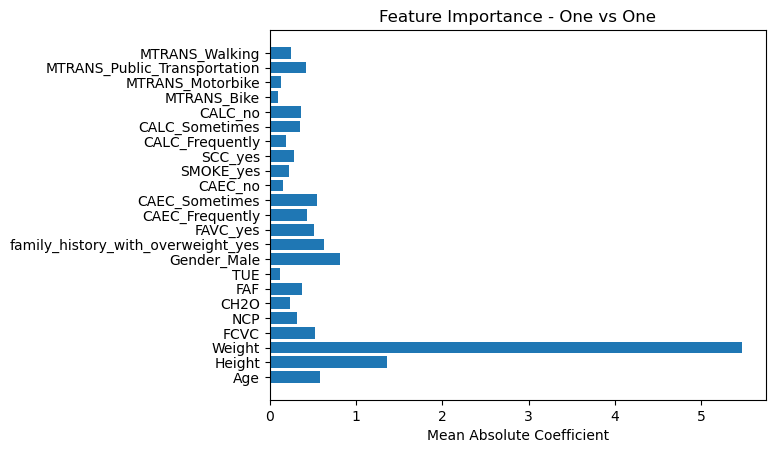

In [64]:
# Coefficients of each binary classifier
coef_ovo = model_ovo.estimators_
# Stack the coefficients into a single matrix
coef_matrix_ovo = np.vstack([ clf.coef_.flatten() for clf in coef_ovo])
# compute the mean absolute value of the coefficients across classes
mean_importance_ovo = np.mean(np.abs(coef_matrix_ovo), axis=0)

plt.barh(X.columns, mean_importance_ovo)
plt.title("Feature Importance - One vs One")
plt.xlabel("Mean Absolute Coefficient")
plt.show()

### Logistic Regression with One vs All approach
- The algorithm trains a single binary classifier for each class
- Each classifier learns to distinguish a single class from all the others combined.
- If there are k classes, k classifiers are trained
- During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class!

Advantages
- Simpler and more efficient in terms of the # of classifiers
- Easier to implement for algorithms that naturally provide confidence scores(e.g. logistic regression, SVM)

Disadvantages
- Classifiers may struggle with class imbalance since each binary classifier must distinguish between one class and the rest
- Requires the classifier to perform well even with highly imbalanced datasets, as the "all" group typically contains more samples than the "One" class

In [ ]:
# Training logistic regression model using One vs All (default)
#model_ova = LogisticRegression(multi_class="ovr", max_iter=1000) # One VS Rest deprecated
model_ova = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_ova.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [58]:
y_pred_ova = model_ova.predict(X_test)

# Evaluating metrics
print("One vs All Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova), 2)}%") #checked

One vs All Strategy
Accuracy: 76.12%


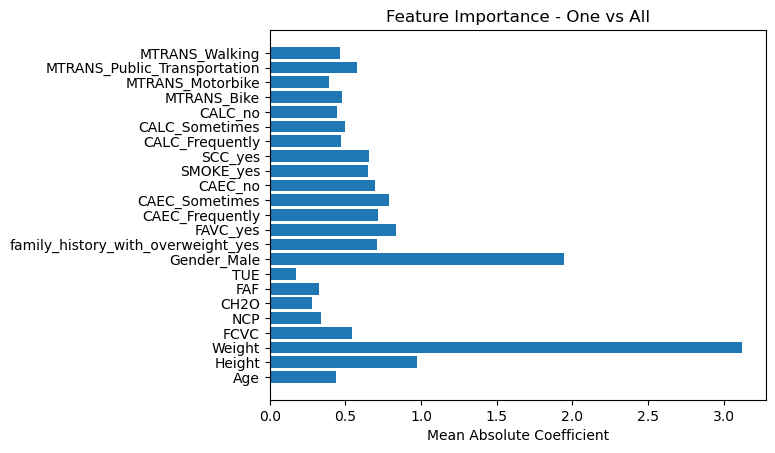

In [63]:
# Coefficients of each binary classifier
coef_ova = model_ova.estimators_
# Stack the coefficients into a single matrix
coef_matrix_ova = np.vstack([ clf.coef_.flatten() for clf in coef_ova])
# compute the mean absolute value of the coefficients across classes
mean_importance_ova = np.mean(np.abs(coef_matrix_ova), axis=0)

plt.barh(X.columns, mean_importance_ova)
plt.title("Feature Importance - One vs All")
plt.xlabel("Mean Absolute Coefficient")
plt.show()